In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
import os

In [5]:
print(os.listdir())

['.ipynb_checkpoints', 'kc_house_data practise.ipynb', 'kc_house_data.csv', 'PRACTISE.ipynb', 'Untitled.ipynb']


In [7]:
pwd

'C:\\Users\\USER\\Documents\\workplace'

In [9]:
data=pd.read_csv("kc_house_data.csv")

In [11]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [13]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
type(data)

pandas.core.frame.DataFrame

In [25]:
data.id

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21608     263000018
21609    6600060120
21610    1523300141
21611     291310100
21612    1523300157
Name: id, Length: 21613, dtype: int64

In [27]:
data.date

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [29]:
data.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [31]:
data.bedrooms

0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 21613, dtype: int64

In [35]:
data.bathrooms

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

In [37]:
data.sqft_living

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [39]:
data.sqft_lot

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21608     1131
21609     5813
21610     1350
21611     2388
21612     1076
Name: sqft_lot, Length: 21613, dtype: int64

In [ ]:
note: we use the method data.describe() to obtain a statistical summary of the dataframe

In [41]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [43]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [71]:
data=data.drop(data.columns[0], axis=1)

In [73]:
print(data)

                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      20141013T000000  221900.0         3       1.00         1180      5650   
1      20141209T000000  538000.0         3       2.25         2570      7242   
2      20150225T000000  180000.0         2       1.00          770     10000   
3      20141209T000000  604000.0         4       3.00         1960      5000   
4      20150218T000000  510000.0         3       2.00         1680      8080   
...                ...       ...       ...        ...          ...       ...   
21608  20140521T000000  360000.0         3       2.50         1530      1131   
21609  20150223T000000  400000.0         4       2.50         2310      5813   
21610  20140623T000000  402101.0         2       0.75         1020      1350   
21611  20150116T000000  400000.0         3       2.50         1600      2388   
21612  20141015T000000  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condit

In [87]:
data=data.drop(columns=['date'])

In [89]:
print(data)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1  

In [99]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [101]:
print("number of NaN values for the column bedrooms :", data['bedrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0


In [103]:
print("number of NaN values for the column bathrooms :", data['bathrooms'].isnull().sum())


number of NaN values for the column bathrooms : 0


In [109]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
#Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.

In [113]:
data['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [10]:
#converting it to dataframe

In [115]:
floor_count=data['floors'].value_counts()

In [117]:
floor_count_data=floor_count.reset_index()

In [119]:
print(floor_count_data)

   floors  count
0     1.0  10680
1     2.0   8241
2     1.5   1910
3     3.0    613
4     2.5    161
5     3.5      8


In [12]:
#converting to dataframe using to_frame()

In [121]:
floor_count=data['floors'].value_counts().to_frame()

In [123]:
print(floor_count_data)

   floors  count
0     1.0  10680
1     2.0   8241
2     1.5   1910
3     3.0    613
4     2.5    161
5     3.5      8


In [32]:
###Use the function boxplot in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.

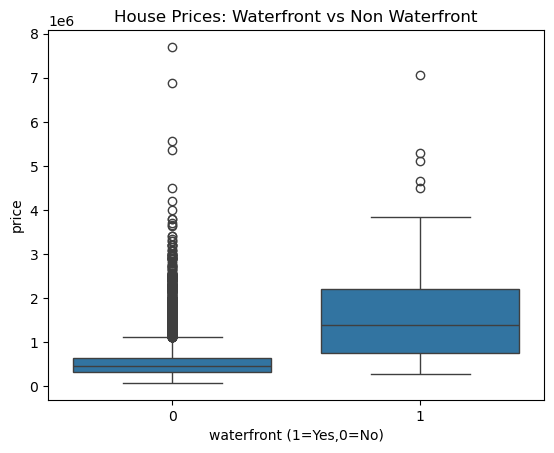

In [44]:
sns.boxplot(x='waterfront',y='price',data=data)
plt.title('House Prices: Waterfront vs Non Waterfront')
plt.xlabel('waterfront (1=Yes,0=No)')
plt.ylabel('price')
plt.show()

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import os

In [24]:
print(os.listdir())

['.ipynb_checkpoints', 'kc_house_data practise.ipynb', 'kc_house_data.csv', 'PRACTISE.ipynb', 'Untitled.ipynb']


In [28]:
data=pd.read_csv("kc_house_data.csv")

In [30]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [34]:
#Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

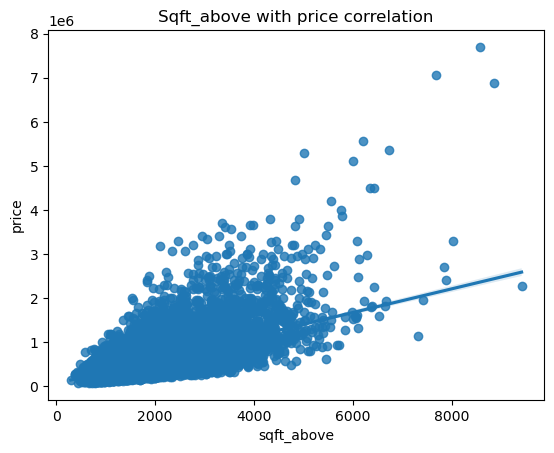

In [38]:
sns.regplot(x="sqft_above", y="price", data=data)
plt.title("Sqft_above with price correlation")
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.show()

In [56]:
#we can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [54]:
X = data[['long']]
Y = data['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [62]:
# Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.

In [66]:
X = data[['sqft_living']]
Y = data['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

In [68]:
# Fit a linear regression model to predict the 'price' using the feature 'floors' then calculate the R^2.

In [70]:
X = data[['floors']]
Y = data['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.06594310068341092

In [72]:
# Fit a linear regression model to predict the 'price' using the feature 'waterfront' then calculate the R^2.

In [76]:
X = data[['waterfront']]
Y = data['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.07095267538578309

In [ ]:
#Create a list of tuples, the first element in the tuple contains the name of the estimator:

 'scale'

 'polynomial'

 'model'

#The second element in the tuple  contains the model constructor

 StandardScaler()

 PolynomialFeatures(include_bias=False)

 LinearRegression()

In [78]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [88]:
#Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [92]:
pipeline = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [96]:
print(pipeline)

[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]


In [98]:
pipeline_object= Pipeline(pipeline)

In [100]:
print(pipeline_object)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])


In [116]:
X = data[['waterfront']]
Y = data['price']
pipeline_object= Pipeline(pipeline)
pipeline_object.fit(X,Y)
pipeline_object.score(X,Y)

0.07093816226983263

In [118]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [120]:
print(features)

['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']


In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [140]:
X = data[features]
Y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
pipeline_object= Pipeline(pipeline)
pipeline_object.fit(x_train, y_train)
pipeline_object.score(x_train, y_train)

0.7539258391188165

In [146]:
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [142]:
from sklearn.linear_model import Ridge

In [144]:
#Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [148]:
ridge = Ridge(alpha=0.1)

In [194]:
X = data[features]
Y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
ridge.score(x_train, y_train)

0.6594278412533257

In [158]:
#Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.


In [174]:
from sklearn.metrics import r2_score

In [180]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [182]:
x_train_poly = poly.fit_transform(x_train)

In [184]:
X = data[features]
Y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
ridge = Ridge(alpha=0.1)
ridge.fit(x_train_poly, y_train)
ridge.score(x_train_poly, y_train)

0.7372691849286952